In [3]:
import numpy as np
import pandas as pd

In [11]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../Datasets/mnist_train.csv')

In [5]:
data.shape

(42000, 785)

In [6]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X = data.values[:,1:]
Y = data.values[:,0]

In [29]:
X.shape

(42000, 784)

In [30]:
Y.shape

(42000,)

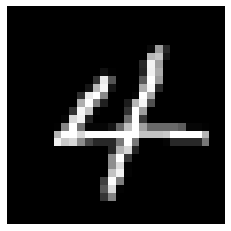

In [31]:
plt.imshow(X[8500].reshape(28,28),cmap='gray')
plt.axis('off')
plt.show()

In [33]:
Y[8500]

4

In [35]:
X = X[:10000]
Y = Y[:10000]

## Step-1 Prepreocessing

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
#make an object
sc = StandardScaler()

In [41]:
# will standardised the data, make mean = 0 and variance = 1
X_ = sc.fit_transform(X)

In [42]:
X_.shape

(10000, 784)

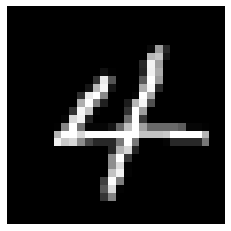

In [43]:
plt.imshow(X[8500].reshape(28,28),cmap='gray')
plt.axis('off')
plt.show()

## Sklearn PCA

In [44]:
from sklearn.decomposition import PCA

In [50]:
# make an object of PCA class
# n_components is the number of final components that we want to extract
pca = PCA(n_components=2)

In [53]:
z_pca = pca.fit_transform(X_)

In [54]:
z_pca.shape

(10000, 2)

In [57]:
z_pca

array([[-4.94973018, -5.44730704],
       [18.96638749,  6.83381405],
       [-7.52791743, -2.05161747],
       ...,
       [-1.54623882, -5.23542787],
       [ 2.42572032, 18.98287676],
       [-0.22647822,  9.90092434]])

In [59]:
pca.explained_variance_

array([40.71864956, 28.79299251])

- Our original data has 100 percent variance, our first new feature is explaining 40% of variance
- total both features are explaining 70% of our data, means we lost around 30% of our information

# Custom PCA

## Step-2 Covariance
- can use the covariance formula to calculate it
- easy way - np.dot(X.T,X) result will be 784,784 and it gives covariance

In [79]:
covar = np.dot(X_.T,X_)

In [80]:
covar.shape

(784, 784)

## Step-3 Compute eigen vectors using svd

In [65]:
from numpy.linalg import svd

In [81]:
u,s,v = svd(covar)

In [82]:
u.shape

(784, 784)

- we are getting all the eigen vectors but we want only first 2

In [83]:
u_red = u[:,:2]
u_red.shape

(784, 2)

## Step-4 Projection

- x is of (10000,784) , we want z to be (10000,2), u is of 784,2

In [70]:
X_.shape

(10000, 784)

In [84]:
z = np.dot(X_,u_red)

In [85]:
z.shape

(10000, 2)

In [86]:
z

array([[  4.94972512,   5.44806854],
       [-18.96637194,  -6.83397157],
       [  7.52793502,   2.05100764],
       ...,
       [  1.54624293,   5.23560819],
       [ -2.42572751, -18.98113797],
       [  0.22648625,  -9.90093373]])

- we can see we are getting almost similar values from both methods
- there is a difference of negative sign that's just because of direction, we are getting mirror image in this method

# Visulaise Dataset

In [89]:
z

array([[  4.94972512,   5.44806854],
       [-18.96637194,  -6.83397157],
       [  7.52793502,   2.05100764],
       ...,
       [  1.54624293,   5.23560819],
       [ -2.42572751, -18.98113797],
       [  0.22648625,  -9.90093373]])

In [92]:
new_dataset = np.hstack((z,Y.reshape(-1,1)))

In [93]:
new_dataset

array([[  4.94972512,   5.44806854,   1.        ],
       [-18.96637194,  -6.83397157,   0.        ],
       [  7.52793502,   2.05100764,   1.        ],
       ...,
       [  1.54624293,   5.23560819,   4.        ],
       [ -2.42572751, -18.98113797,   7.        ],
       [  0.22648625,  -9.90093373,   9.        ]])

In [94]:
dataframe = pd.DataFrame(new_dataset,columns=['PCA1','PCA2','label'])

In [96]:
dataframe.head()

,PCA1,PCA2,label
0,4.949725,5.448069,1.0
1,-18.966372,-6.833972,0.0
2,7.527935,2.051008,1.0
3,0.715448,-5.555069,4.0
4,-26.253689,-7.291958,0.0


In [98]:
import seaborn as sns

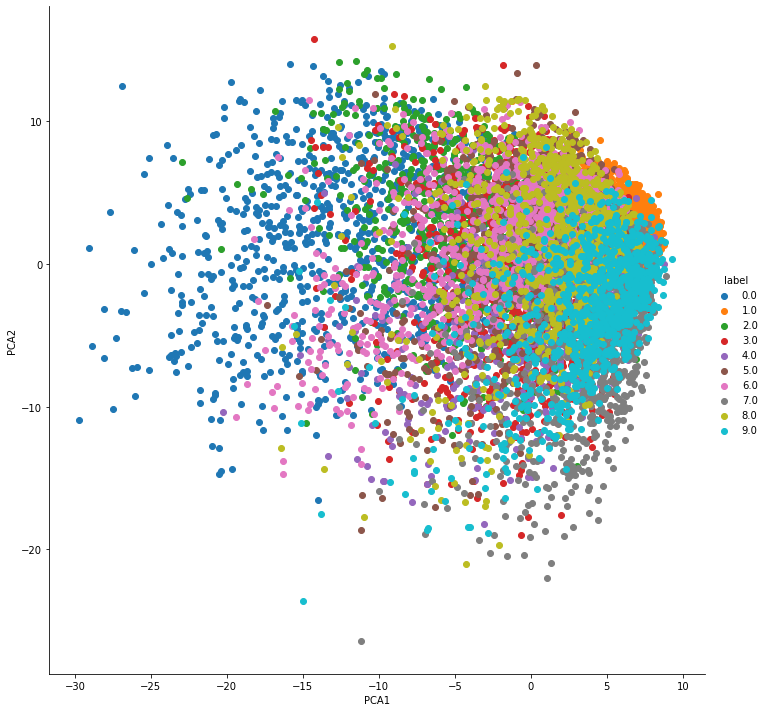

In [110]:
fg = sns.FacetGrid(dataframe,hue='label',height=10)
fg.map(plt.scatter,'PCA1','PCA2')
fg.add_legend()
plt.show()

- all the members of same class are grouped together
- this is how we can visualise our data by converting into 2 dimensions
- there is so much noise because we converted direct from 784 to 2 dimensions 

## PCA with 784

In [111]:
pca = PCA() # if we donot provide any default argument we get 784 principal componenets

In [112]:
z_pca = pca.fit_transform(X_)

In [114]:
z_pca.shape

(10000, 784)

- these are not our old features, these are principal componnets (new dimensions)

In [115]:
pca.explained_variance_

array([4.07186496e+01, 2.87929927e+01, 2.72040371e+01, 2.09933366e+01,
       1.80427386e+01, 1.58413873e+01, 1.35664377e+01, 1.25476412e+01,
       1.11691525e+01, 9.89909873e+00, 9.58543081e+00, 8.62882716e+00,
       8.10111086e+00, 8.03397716e+00, 7.56956712e+00, 7.26881025e+00,
       6.74924500e+00, 6.54616502e+00, 6.46388225e+00, 6.29322630e+00,
       6.05867380e+00, 5.73014042e+00, 5.57365254e+00, 5.36725542e+00,
       5.23964003e+00, 4.97165174e+00, 4.94901180e+00, 4.76696080e+00,
       4.62832917e+00, 4.48981653e+00, 4.41695884e+00, 4.36410204e+00,
       4.27126867e+00, 4.17041876e+00, 4.07899573e+00, 3.99495911e+00,
       3.96758413e+00, 3.91330523e+00, 3.74677990e+00, 3.63041195e+00,
       3.59557266e+00, 3.57750588e+00, 3.49891188e+00, 3.42791563e+00,
       3.33077306e+00, 3.25082405e+00, 3.21173152e+00, 3.16237356e+00,
       3.09358262e+00, 3.06239500e+00, 3.02011172e+00, 2.99703207e+00,
       2.91356254e+00, 2.85346918e+00, 2.81972202e+00, 2.74284452e+00,
      

- first Principal component is explaining 40% of variance
- as we are going down,it's reducing
- last features are almost zero, therfore we will not take these features

In [117]:
np.sum(pca.explained_variance_)

675.0675067506752

ratio = explained_variance/np.sum(pca.explained_variance_)

In [118]:
pca.explained_variance_ratio_

array([6.03178929e-02, 4.26520199e-02, 4.02982470e-02, 3.10981294e-02,
       2.67273101e-02, 2.34663750e-02, 2.00964164e-02, 1.85872392e-02,
       1.65452379e-02, 1.46638649e-02, 1.41992182e-02, 1.27821693e-02,
       1.20004455e-02, 1.19009982e-02, 1.12130521e-02, 1.07675309e-02,
       9.99788159e-03, 9.69705244e-03, 9.57516424e-03, 9.32236590e-03,
       8.97491546e-03, 8.48824801e-03, 8.25643729e-03, 7.95069437e-03,
       7.76165343e-03, 7.36467344e-03, 7.33113614e-03, 7.06145793e-03,
       6.85609827e-03, 6.65091488e-03, 6.54298836e-03, 6.46468982e-03,
       6.32717265e-03, 6.17778033e-03, 6.04235235e-03, 5.91786610e-03,
       5.87731462e-03, 5.79690949e-03, 5.55022996e-03, 5.37785024e-03,
       5.32624163e-03, 5.29947871e-03, 5.18305480e-03, 5.07788568e-03,
       4.93398516e-03, 4.81555402e-03, 4.75764497e-03, 4.68452936e-03,
       4.58262705e-03, 4.53642780e-03, 4.47379216e-03, 4.43960351e-03,
       4.31595731e-03, 4.22693902e-03, 4.17694822e-03, 4.06306702e-03,
      

In [119]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

In [120]:
cum_var_explained

array([0.06031789, 0.10296991, 0.14326816, 0.17436629, 0.2010936 ,
       0.22455997, 0.24465639, 0.26324363, 0.27978887, 0.29445273,
       0.30865195, 0.32143412, 0.33343457, 0.34533556, 0.35654862,
       0.36731615, 0.37731403, 0.38701108, 0.39658625, 0.40590861,
       0.41488353, 0.42337177, 0.43162821, 0.43957891, 0.44734056,
       0.45470523, 0.46203637, 0.46909783, 0.47595393, 0.48260484,
       0.48914783, 0.49561252, 0.50193969, 0.50811747, 0.51415982,
       0.52007769, 0.525955  , 0.53175191, 0.53730214, 0.54267999,
       0.54800624, 0.55330571, 0.55848877, 0.56356665, 0.56850064,
       0.57331619, 0.57807384, 0.58275837, 0.587341  , 0.59187742,
       0.59635122, 0.60079082, 0.60510678, 0.60933372, 0.61351066,
       0.61757373, 0.62160395, 0.62558544, 0.62951792, 0.63337967,
       0.63715011, 0.64084564, 0.64448207, 0.64811352, 0.65169849,
       0.65518069, 0.65864002, 0.66205224, 0.6654211 , 0.66875398,
       0.6720299 , 0.67529093, 0.67854343, 0.6817633 , 0.68486

- the first part is 0.06, this is the ratio that first component is explaining
- second part is explaining some ratio and it will add the previous ratio
- by seeing this we can stop when we have got 90percnt of ratio

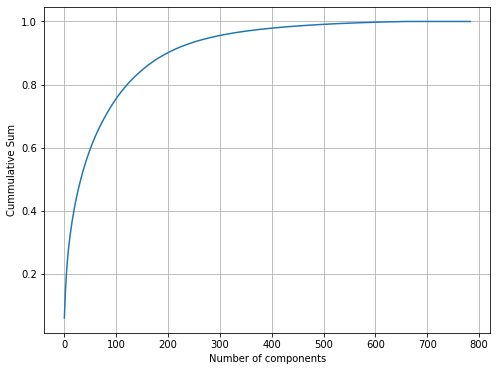

In [125]:
plt.figure(figsize=(8,6))
plt.plot(cum_var_explained)
plt.xlabel('Number of components')
plt.ylabel('Cummulative Sum')
plt.grid()
plt.show()

- with 200 Prinicpal Componenets we are having 90 percent of variance, we donot need other dimnesions